In [6]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [7]:
data = pd.read_csv('deer.csv')
df=data.head()
print(df)
print ('\n Data Types:')
print (data.dtypes)

         Date  Population  Unnamed: 2  Unnamed: 3
0  2017-01-01          20         NaN          12
1  2017-02-01          20         NaN          13
2  2017-03-01          20         NaN          20
3  2017-04-01          23         NaN           7
4  2017-05-01          23         NaN          15

 Data Types:
Date           object
Population      int64
Unnamed: 2    float64
Unnamed: 3      int64
dtype: object


In [8]:
from datetime import datetime
con=data['Date']
data['Date']=pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
#check datatype of index
data.index

DatetimeIndex(['2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
               '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
               '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [5]:
#convert to time series:
ts = data['Population']
ts.head(4)

Date
2017-03-01    12
2017-06-01    13
2017-09-01    12
2017-12-01    14
Name: Population, dtype: int64

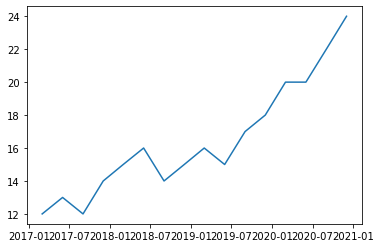

In [6]:
plt.plot(ts)

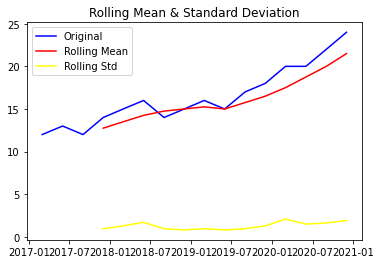

Results of Dickey-Fuller Test:
Test Statistic                 5.866639
p-value                        1.000000
#Lags Used                     6.000000
Number of Observations Used    9.000000
Critical Value (1%)           -4.473135
Critical Value (5%)           -3.289881
Critical Value (10%)          -2.772382
dtype: float64


In [7]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    
    #Determing rolling statistics
    #rolmean = pd.rolling_mean(timeseries, window=12)
    rolmean = timeseries.rolling(window=4).mean()
    #rolstd = pd.rolling_std(timeseries, window=12)
    rolstd = timeseries.rolling(window=4).std()
 

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='yellow', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
     
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
 

test_stationarity(ts)